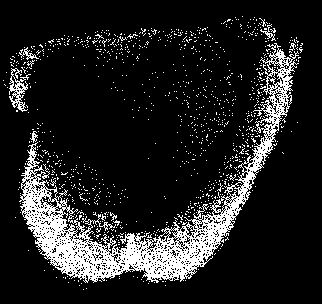

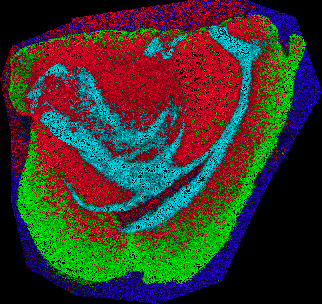

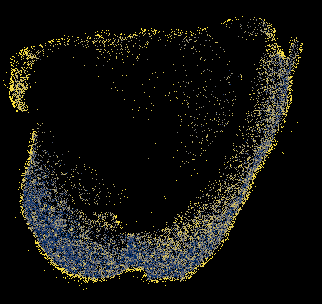

In [104]:
import numpy as np
import joblib
from sklearn.metrics.pairwise import cosine_similarity
from visualizations import get_colors, show_factorization_on_image
from PIL import Image
import matplotlib.pyplot as plt
import cv2

region = 1

W, H = np.load(f"{region}_w.npy"), np.load(f"{region}_h.npy")
model = joblib.load("kmeans.joblib")
centers = model.cluster_centers_
order = []
diffs = []
img = np.load(f"D:\\maldi\\{region}.npy")

for i in range(len(H)):
    sim = cosine_similarity(H[i, :][None, :], centers)[0, :]
    diffs.append(sim.max())
    order.append(sim.argmax())

NUM_COMPONENTS = 5
explanations = W.transpose().reshape(NUM_COMPONENTS, img.shape[0], img.shape[1])
explanations_orig = W.transpose().reshape(NUM_COMPONENTS, img.shape[0], img.shape[1])
explanations = explanations / explanations.sum(axis=(1, 2))[:, None, None]
explanations = explanations / np.percentile(explanations, 99, axis=(1, 2))[:, None, None]
explanations = explanations[0 : , :, :]

colors = get_colors(NUM_COMPONENTS)

colors_ordered = [colors[i] for i in order]    

roi_mask = img.sum(axis=-1)
mask = 255 * np.uint8(explanations_orig.argmax(axis=0) == order.index(2))

# mask = cv2.medianBlur(mask, 3)
# dilatation_size = 1
# element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * dilatation_size + 1, 2 * dilatation_size + 1),
#                                    (dilatation_size, dilatation_size))
# mask = cv2.erode(mask, element)

# dilatation_size = 1
# element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * dilatation_size + 1, 2 * dilatation_size + 1),
#                                    (dilatation_size, dilatation_size))
# mask = cv2.dilate(mask, element)




mask[roi_mask == 0] = 0
display(Image.fromarray(mask))

visualization = show_factorization_on_image(np.zeros(shape=((img.shape[0], img.shape[1], 3))),
                                            explanations,
                                            image_weight=0.0,
                                            colors=colors_ordered)
display(Image.fromarray(visualization))

#display(Image.fromarray(mask))

sim = cosine_similarity(centers[2][None, :], img[:, :, 300: ].reshape(-1, 701))
sim = sim.reshape(img.shape[:2])
#sim = sim - np.min(sim)
#sim = sim / np.max(sim)
sim = 1 - sim
sim[mask == 0] = 0
sim = sim / np.max(sim)
sim = np.uint8(255 * sim)
sim = cv2.equalizeHist(sim)

sim = cv2.applyColorMap(sim, cv2.COLORMAP_CIVIDIS)[:, :, ::-1]
sim[mask == 0] = 0
display(Image.fromarray(sim))

In [18]:
304 * 322

97888